# Housing Pricing [project 1]

objective: To predict the sales final price for each house

steps to follow to complete the project:
1.Conducting Explorative Data Analyses:
.identification of variables and data types
.analyzing the basic metrics
.non-grapgical univariate analysis
.graphical univariate analysis
.bivariate analysis
.variable transformations
.missing value treatment
.outlier treatment
.correlation analysis
.dimensionality reduction

2.Engineer and transform the features and the target variable
3.Build a model
4.make and submit predictions


In [2]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#reading the data set
#reading the test data
housing_test = pd.read_csv('test.csv')
#reading the train data
housing_train = pd.read_csv('train.csv')
housing_test.head()#to check the first few row for the test data
housing_train.head()#to check for the first 5 few row of the train data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking the information of the train data and the and the Test data
housing_test.info()
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
#describing the train and the test data set
housing_train.describe()
housing_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
housing_train.isnull()#checking for null value
housing_test.isnull()#checking for null value
#filling null value using the mean score


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1455,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


step:2 Explore the data and engineer Features
since the challenges is to predict the final sale price of the homes. this information is stored  in the sale price column
note: the value we are trying to predict is always refer to as target variable 

skew is: 1.8828757597682129


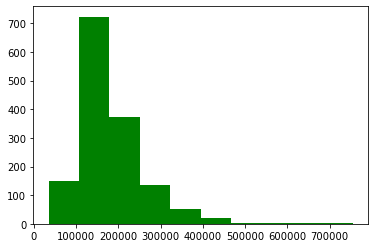

In [6]:
#using series.describe to get more info about the sale price column
housing_train.SalePrice.describe() 
#checking for the skewness of the saleprice column:
print('skew is:',housing_train.SalePrice.skew())
plt.hist(housing_train.SalePrice,color='green')
plt.show()

skew is: 0.12133506220520406


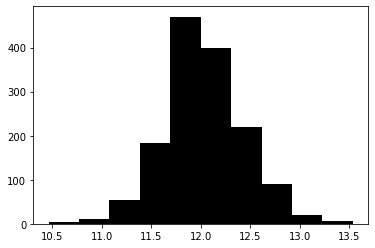

In [7]:
#now we use np.log()[used to calculate the log value of the series]to transform train.SalePrice and calculate the skewness A second time as well as replot the data
#note: a value closer to 0 means that we have improved the skewmess of the data.
model_target = np.log(housing_train.SalePrice)
print('skew is:',model_target.skew())
plt.hist(model_target,color='black')
plt.show()

In [8]:
#checking for our feature engineer and make some plot on it.the select_dtypes() method will return a subset pf columns matching the specified  data types
#(Working with numerical features)
numeric_features = housing_train.select_dtypes(include=[np.number])
numeric_features.dtypes
#housing_train.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [9]:
#using dataframe.corr() method displays the correlation or relationship btw the columns.
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])
#interpretation: its shows that the first five features are the most positively correlated with saleprice
#while the next five are the most negatively correlated.



SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [10]:
#using the unique method to get the unique values by going deeper  on overallquality
housing_train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [12]:
#creating a pivot table to further investigate the relationship between ovalallqual and SalePrice.using the pandas docs
quality_pivot = housing_train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
quality_pivot



,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


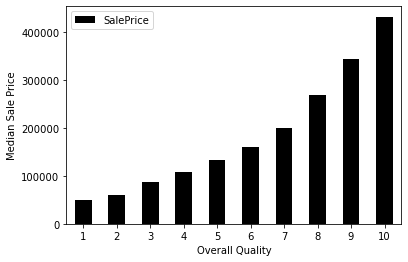

In [19]:
#we can create a more bar plot using the series.plot() method to help visualise the pivot table
quality_pivot.plot(kind='bar',color='black')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

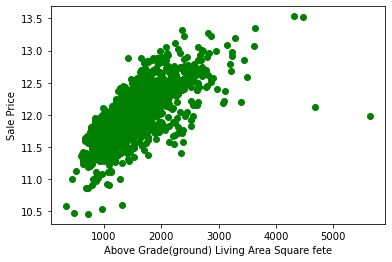

In [19]:
#using scatter plot to check the correlation btw saleprice and GrlivArea and saleprice
plt.scatter(x=housing_train['GrLivArea'],  y=model_target,color='green')
plt.xlabel('Above Grade(ground) Living Area Square fete')
plt.ylabel('Sale Price')
plt.show()

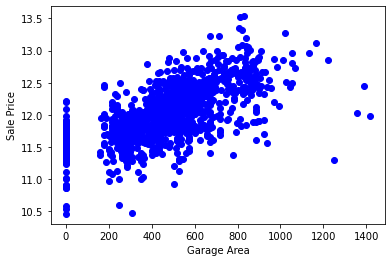

In [20]:
#using scatter plot to check the correlation btw saleprice and garagearea
plt.scatter(x=housing_train['GarageArea'],y=model_target,color='blue')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

ValueError: x and y must be the same size

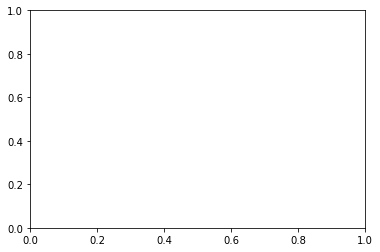

In [25]:
#removing the outliers that plays out in the correlation between saleprice AND garage
housing_train=housing_train[housing_train['GarageArea']<1200]
plt.scatter(x=housing_train['GarageArea'],y=model_target,color='black')
plt.xlim(-200,1600)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [27]:
#handling null values to indicate the top null values in the data set
train_null= pd.DataFrame(housing_train.isnull().sum().sort_values(ascending=False)[:25])#counting the first 25 null values
train_null.columns = ['Null Count']
train_null.index.name = 'Feature'
train_null


,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [28]:
#checking the unique value in MiscFeature.
print('Unique Values are:',housing_train.MiscFeature.unique())

Unique Values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


wrangling the non numeric features

In [29]:
categoricals_num = housing_train.select_dtypes(exclude=[np.number])#to exclude non numerical number
categoricals_num.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


Trandorming and engineering features

Note: when transforming features, its important to remember that any transformations that you have applied to the training data must be applied to the test data.

In [30]:
#considering the stret data, which shows gravwl or paved road access to the property
print('Original:\n')#regex example
print(housing_train.Street.value_counts(),'\n')

Original:

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [31]:
#tranforming the data into a boolean column with an encoding using pd.get_dummies().
housing_train['enc_street'] = pd.get_dummies(housing_train.Street, drop_first=True)
housing_test['enc_street'] = pd.get_dummies(housing_test.Street, drop_first=True)
print('Encoded: \n')
print(housing_train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


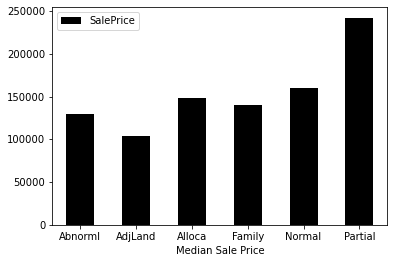

In [32]:
#constructing a pivot table for salecondition to carry out our EF 2
condition_pivot = housing_train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='black')
plt.xlabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

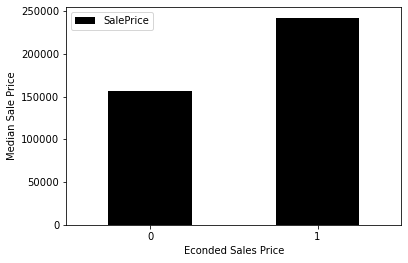

In [33]:
#we will encode the  partial value as a new features; EF 3
def encode(x):
    return 1 if x == 'Partial' else 0
housing_train['enc_condition'] = housing_train.SaleCondition.apply(encode)
housing_test['enc_condition'] = housing_test.SaleCondition.apply(encode)
#exploring our new feature as plot
condition_pivot = housing_train.pivot_table(index='enc_condition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='black')
plt.xlabel('Econded Sales Price')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [34]:
#interpolation:filling our missing data with the median value
data = housing_train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum()) !=0

False

Model building(Liner model to predict our analysis) 
*we will separate the feature and target variable for modelling, we will assign the features to X and the target variable to y.
*partitioning of the data using train_test_split() function from scikit-learn to create a training set and a hold out set.
note:if we train the model on all of the test data it will be difficult to tell if overfitting has taken place.

In [1]:
y = np.log(housing_train.SalePrice)#transforming the y variable for the model
x = data.drop(['SalePrice','Id'], axis = 1)#telling pandas which column we will like to exclude
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.33)

NameError: name 'np' is not defined

In [36]:
#beginning a model:creating a linear regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
housing_model = lr.fit(x_train,y_train)#using the lr.fit method to fit the linear regression
print('R^2 is: \n', housing_model.score(x_test,y_test))#to return the r squared value

R^2 is: 
 0.8882477709262544


In [37]:
#considering rmse:using the build model to make predictions on the test data set
predictions = housing_model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test,predictions))#measuring the distance btw our predicted values and actual values


RMSE is: 
 0.017841794519567713


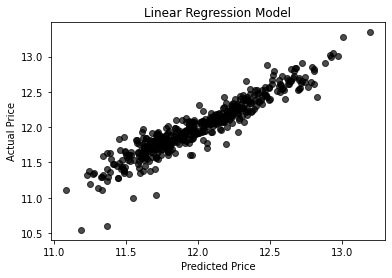

In [38]:
#viewing the relationship with a scatter plot
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,color='black')#alpha helps to show overlapping data 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

Ridge Regularization: is a process which shrinks the regression coefficeint of less important features.

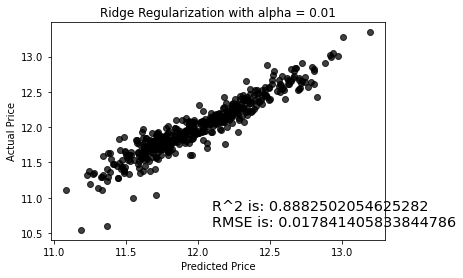

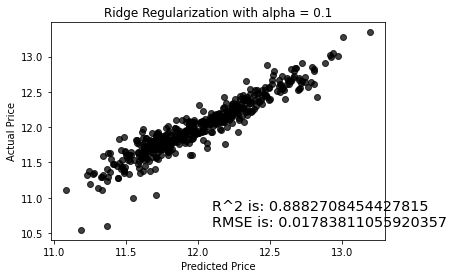

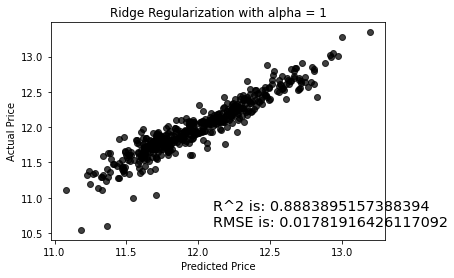

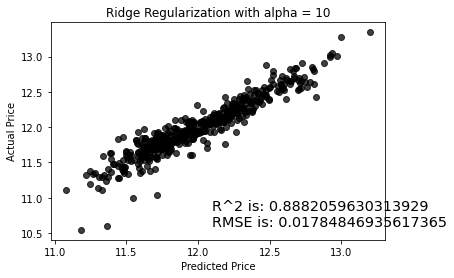

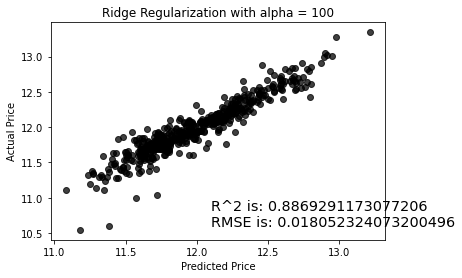

In [39]:
for i in range (-2,3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)
    plt.scatter(preds_ridge,actual_values, alpha=.75,color='black')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(x_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    